313/313 [==============================] - 1s 4ms/step - loss: 0.1522 - accuracy: 0.9614
Test Loss:  0.1522255688905716
Test Accuracy:  0.9613999724388123
313/313 [==============================] - 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       1.00      0.97      0.98      1135
           2       0.99      0.88      0.93      1032
           3       0.99      0.96      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.95      0.96      0.96      1028
           8       0.84      0.99      0.91       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



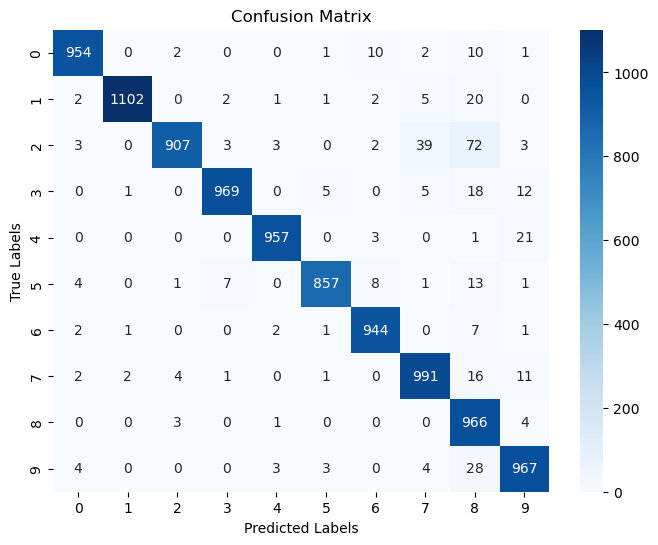

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def load_data():
    # Load the MNIST dataset
    mnist = tf.keras.datasets.mnist
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    # Preprocess the data
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Reshape the data
    X_train = np.reshape(X_train, (-1, 28, 28, 1))
    X_test = np.reshape(X_test, (-1, 28, 28, 1))

    return X_test, Y_test

def load_model(model_file):
    # Load the model from the file
    model = tf.keras.models.load_model(model_file)

    return model

def test_model(model, X_test, Y_test):
    # Evaluate the model on the testing dataset
    test_loss, test_acc = model.evaluate(X_test, Y_test)

    # Print the test loss and accuracy
    print("Test Loss: ", test_loss)
    print("Test Accuracy: ", test_acc)

    # Perform predictions on the testing dataset
    predictions = model.predict(X_test)

    # Convert predicted probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate and print classification report
    print("Classification Report:")
    print(classification_report(Y_test, predicted_labels))

    # Plot a confusion matrix
    cm = confusion_matrix(Y_test, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Load the testing data
X_test, Y_test = load_data()

# Specify the path to your model file
model_file = "model.h5"

# Load the model
model = load_model(model_file)

# Test the model
test_model(model, X_test, Y_test)

In [6]:
import cv2
import numpy as np

# Load external image

image = cv2.imread('C:\\Users\\Narendra\\Desktop\\samples\\six.png')


# Reshape the image to match the input shape of your model
# image = np.reshape(image, (1, 28, 28, 1))
# plt.imshow(image, cmap=plt.cm.binary)   


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

resized = cv2.resize(gray, (28, 28), interpolation= cv2.INTER_AREA)
print("resized Shape : ",resized.shape)


newImg = tf.keras.utils.normalize(resized, axis=1)

newImg = np.array(newImg).reshape(-1, 28, 28, 1)
newImg.shape

# plt.imshow(image.reshape(28,28), cmap=plt.cm.binary)

resized Shape :  (28, 28)


(1, 28, 28, 1)

1/1 [==============================] - 0s 16ms/step
Predicted digit probably be : 6


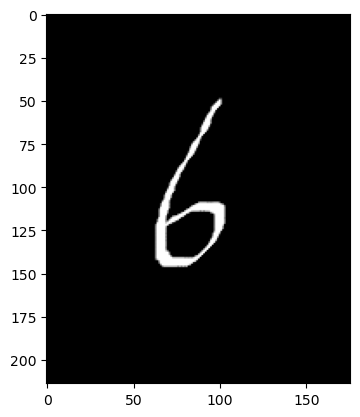

In [7]:
# Perform prediction on the external image
prediction = model.predict(newImg)

# Convert predicted probabilities to class label
predicted_label = np.argmax(prediction)

plt.imshow(image, cmap=plt.cm.binary)   

# Print the predicted label
print("Predicted digit probably be :", predicted_label)